# SI 618 - Day 4: Univariate and Visual Analysis I



# Overview of today 

- understand why getting a feel for your data is important
- be able to calculate some basic descriptive statistics
 - measures of central tendency 
 - measures of dispersion
- know how to make visualizations using the Seaborn library
- be able to recognize different distributions using visual and analytic techniques




# So, you want to explore your data...
* How can we describe it?
* What does it look like?
* What sorts of "preliminary checks" can we perform on our data? 
 * Why would we want to to this?

# Think about plotting the relationship between X and Y
![](https://github.com/umsi-data-science/si618-student/raw/main/assets/AnscombeData.png)
(https://en.wikipedia.org/wiki/Anscombe's_quartet)

# A nice linear relationship, right?
![](https://github.com/umsi-data-science/si618-student/raw/main/assets/AnscombeQ1.png)
(https://en.wikipedia.org/wiki/Anscombe's_quartet)

# Anscombe's Quartet
![](https://github.com/umsi-data-science/si618-student/raw/main/assets/AnscombePlot.png)
(https://en.wikipedia.org/wiki/Anscombe's_quartet)

# Why do we care?

* Statistical analysis requires good inputs
 * Remember Anscombe’s quartet
 * Which model should we use?
 * Tendencies/trends/patterns in data are important in picking the right models
* Anomalies are important to detect and understand




## Purpose of EDA (broadly)
* maximize insight into a data set
* uncover underlying structure
* extract important variables
* detect outliers and anomalies
* test underlying assumptions
* develop parsimonious models and
* determine optimal factor settings.

(National Institute of Standards and Technology)

## Our primary goal in this class: understand the _downstream_ statistical analyses enough so that we can make good decisions

# Spherical cows
The phrase comes from a joke that spoofs the simplifying assumptions that are sometimes used in theoretical physics.

>Milk production at a dairy farm was low, so the farmer wrote to the local university, asking for help from academia. A multidisciplinary team of professors was assembled, headed by a theoretical physicist, and two weeks of intensive on-site investigation took place. The scholars then returned to the university, notebooks crammed with data, where the task of writing the report was left to the team leader. Shortly thereafter the physicist returned to the farm, saying to the farmer, "I have the solution, but it works only in the case of spherical cows in a vacuum". [Wikipedia](https://en.wikipedia.org/wiki/Spherical_cow)

![Spherical cow](https://github.com/umsi-data-science/si618-student/raw/main/assets/Spot_the_cow.gif)




## The average weight of a Jersey cow is 1,000 lbs.
![](../assets/jersey.jpg)

# Let's make some spherical cows...

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
# The weights of a herd of 80 cows
np.random.seed(370)
measures = (np.random.standard_normal(80)*150+1000).astype(int)
measures

array([ 786,  856,  942, 1125,  907,  908, 1180,  961,  794, 1111, 1031,
        998, 1025, 1176,  877,  904,  876, 1059,  935, 1015, 1105, 1129,
       1090,  978, 1052,  912,  991, 1297, 1017, 1023, 1169, 1242,  805,
       1159, 1067, 1227, 1089, 1179, 1143, 1066, 1032, 1114,  928, 1138,
        951,  893,  954,  980,  803, 1121,  783,  704,  863, 1131, 1021,
        947,  930, 1117,  840, 1179,  911, 1026,  772,  886,  795, 1137,
        970,  970, 1042,  645,  959,  972,  921, 1172,  891, 1253,  875,
        743,  912, 1054])

In [2]:
# The weights of a herd of 80 cows
np.random.seed(370) #set same generator, will have same results when using random
measures = np.random.normal(loc=1000,scale=150,size=80).astype(int) # note kwargs
# loc=mean, scale=standard deviation, size= sample_size
measures

array([ 786,  856,  942, 1125,  907,  908, 1180,  961,  794, 1111, 1031,
        998, 1025, 1176,  877,  904,  876, 1059,  935, 1015, 1105, 1129,
       1090,  978, 1052,  912,  991, 1297, 1017, 1023, 1169, 1242,  805,
       1159, 1067, 1227, 1089, 1179, 1143, 1066, 1032, 1114,  928, 1138,
        951,  893,  954,  980,  803, 1121,  783,  704,  863, 1131, 1021,
        947,  930, 1117,  840, 1179,  911, 1026,  772,  886,  795, 1137,
        970,  970, 1042,  645,  959,  972,  921, 1172,  891, 1253,  875,
        743,  912, 1054])

In [3]:
np.random.seed(370)
measures = np.random.normal(size=80,loc=1000,scale=150).astype(int) # note kwargs allow any order of arguments
measures

array([ 786,  856,  942, 1125,  907,  908, 1180,  961,  794, 1111, 1031,
        998, 1025, 1176,  877,  904,  876, 1059,  935, 1015, 1105, 1129,
       1090,  978, 1052,  912,  991, 1297, 1017, 1023, 1169, 1242,  805,
       1159, 1067, 1227, 1089, 1179, 1143, 1066, 1032, 1114,  928, 1138,
        951,  893,  954,  980,  803, 1121,  783,  704,  863, 1131, 1021,
        947,  930, 1117,  840, 1179,  911, 1026,  772,  886,  795, 1137,
        970,  970, 1042,  645,  959,  972,  921, 1172,  891, 1253,  875,
        743,  912, 1054])

In [7]:
np.random.seed(370)
measures = np.random.normal(1000,150,80).astype(int) # note use of args (not kwargs); must use this order: mean,sd,size
measures

array([ 786,  856,  942, 1125,  907,  908, 1180,  961,  794, 1111, 1031,
        998, 1025, 1176,  877,  904,  876, 1059,  935, 1015, 1105, 1129,
       1090,  978, 1052,  912,  991, 1297, 1017, 1023, 1169, 1242,  805,
       1159, 1067, 1227, 1089, 1179, 1143, 1066, 1032, 1114,  928, 1138,
        951,  893,  954,  980,  803, 1121,  783,  704,  863, 1131, 1021,
        947,  930, 1117,  840, 1179,  911, 1026,  772,  886,  795, 1137,
        970,  970, 1042,  645,  959,  972,  921, 1172,  891, 1253,  875,
        743,  912, 1054])

## Create some objects of your own
Think of some object and some property of that object.  I used cows and their weights.  Pick something that you know something about, and create a NumPy array of some number of them (ideally between 20 and 50000), recording some property.  So you might choose something like the height of undergraduate students, etc.  Pick something that will *likely* have a normal distribution (which is probably most things you can think of).</font>

First, pick the number that you want and assign it to numberOfObjects, then pick the mean value and assign it to meanOfProperty, and finally pick the standard deviation and assign it to standardDevitationOfProperty.  It doesn't matter what you pick, but if you're unsure pick 1/5 of the mean.

In [12]:
numberOfObjects = 50    # change 0 to some number between 20 and 50000
meanOfProperty = 500     # change 0 to the mean value of the property you're interested in
standardDeviationOfProperty = 1/5 # change 0 to the variance of the property -- try meanOfProperty/5 if you have no idea

Now create some data by asking for a random sample from a normal distribution, scaled so that it matches the mean and variance you want:

In [13]:
things = np.random.normal(size=numberOfObjects,loc=meanOfProperty,scale=standardDeviationOfProperty)
things = things.astype(int)
things[:10]

array([500, 500, 500, 500, 500, 500, 499, 499, 499, 499])

<div style="width:100%;height:400px;padding:10px;background-color:#"></div>

## Measures of central tendency
* Mean
* Median 
* Mode

## Mean

Add up all the values and divide by the number of values:

$$mean = \frac {\sum{x_i}} {n}$$


In [14]:
sum(measures)/len(measures)

994.2625

In [15]:
np.mean(measures) # find the mean

994.2625

## Median

sort all the numbers and find the one in the middle

In [16]:
measures = np.sort(measures)
measures

array([ 645,  704,  743,  772,  783,  786,  794,  795,  803,  805,  840,
        856,  863,  875,  876,  877,  886,  891,  893,  904,  907,  908,
        911,  912,  912,  921,  928,  930,  935,  942,  947,  951,  954,
        959,  961,  970,  970,  972,  978,  980,  991,  998, 1015, 1017,
       1021, 1023, 1025, 1026, 1031, 1032, 1042, 1052, 1054, 1059, 1066,
       1067, 1089, 1090, 1105, 1111, 1114, 1117, 1121, 1125, 1129, 1131,
       1137, 1138, 1143, 1159, 1169, 1172, 1176, 1179, 1179, 1180, 1227,
       1242, 1253, 1297])

In [17]:
measures[len(measures)//2]  # find middle value

991

In [19]:
np.median(measures) # do mean bettwen 2 median values

985.5

## Another alternative: Mode

* mode = most common value
* Unfortunately not in default numpy


In [21]:
from scipy import stats # mode is not in np
stats.mode(measures)

ModeResult(mode=array([912]), count=array([2]))

## Calculate the mean, median and mode of your "things"

Step 1: Just run the following cell (assumes you have some data in an np array called "things")

In [23]:
from scipy import stats # just in case we didn't already do it

thingsMean = np.mean(things)
thingsMedian = np.median(things)
thingsMode = stats.mode(things)

print(thingsMean, thingsMedian, thingsMode)

499.4 499.0 ModeResult(mode=array([499]), count=array([30]))


Step 2: Now, to demonstrate what happens to mean, median and mode when you add an outlier, append some crazy big value to the end of your things.  But let's not mess up our things array, so let's copy it first

In [26]:
things2 = things.copy() #copy will not change original data
things2 = np.append(things2,[100000])
things2Mean = np.mean(things2)
things2Median = np.median(things2)
things2Mode = stats.mode(things2)

print(things2Mean, things2Median, things2Mode)

2450.392156862745 499.0 ModeResult(mode=array([499]), count=array([30]))


<div style="width:100%;height:400px;padding:10px;background-color:#"></div>

## Measures of dispersion

* Percentile cutoffs
 * Interpercentile range
* Variance
* Standard Deviation

## Percentiles

* In a *sorted* list, find the threshold so that data is split
 * 5th percentile -- bottom 5% of measures below threshold
 * 25th percentile -- bottom 25% of measures below
 * 97th percentile -- bottom 97% of mesures below

## Numpy does this well

`np.percentile(array,percentile,
               interpolation='linear')`

* linear: i + (j - i) 
* fraction, where fraction is the fractional part of the index surrounded by i and j.
* lower: i.
* higher: j.
* nearest: i or j, whichever is nearest.
* midpoint: (i + j) / 2.


In [27]:
np.percentile(measures,25) # the 25th percentile, 至少25%的数小于这个百分位数

906.25

In [29]:
np.percentile(measures,25,interpolation='midpoint') 

905.5

## Interpercentile Range

* Sometimes we want to some range
 * e.g., 5th -- 95th percentile
 * clearly, 90% of measures sit here

In [30]:
print(np.percentile(measures,5),"-",np.percentile(measures,95))

782.45 - 1182.35


## Variance

How does the data spread around the mean?

$$ variance = \frac{\sum{(x_i - \mu)^2}}{n}$$

where, $\mu$ is the mean

$$ mu = \frac{\sum{x_i}}{n}$$

## Standard Deviation

* Measure of dispersion 

![standard deviation](https://github.com/umsi-data-science/si618-student/raw/main/assets/Standard_deviation_diagram.svg.png)
(https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/640px-Standard_deviation_diagram.svg.png "sd")

In [31]:
print(np.percentile(measures,5),"-",np.percentile(measures,95))
print(np.var(measures))
print(np.std(measures))  # this should be the square root of variance

782.45 - 1182.35
18807.14359375
137.13913953992127


<div style="width:100%;height:400px;padding:10px;background-color:#"></div>

<div style="width:100%;height:400px;padding:10px;background-color:#"></div>

# Visualizing data with Seaborn
* Visualization package built on top of matplotlib
* It's meant to make your life better
* Plays well with pandas, numpy, scipy, and statsmodels
* Many different visualization are included:
 * Strip plots, Swarm plots, Violin plots
 * Box plots
 * Histograms
 
 We need to import the package, and it's typically imported as sns:
 
 ```
 import seaborn as sns
 ``` 
 
 and don't forget to inline matplotlib (that's a jupyter thing):

 ```
 %matplotlib inline
 ```

[seaborn.pydata.org](http://seaborn.pydata.org)

How about [some examples](http://seaborn.pydata.org/examples/index.html)?

In [32]:
import seaborn as sns

## Strip Plot

In [37]:
%matplotlib inline 
# show inline plots in notebook

<AxesSubplot:>

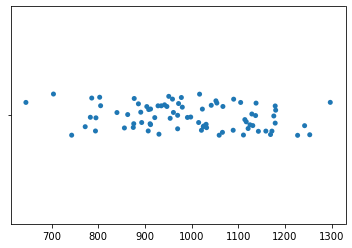

In [38]:
sns.stripplot(x=measures)

## Swarm Plot

<AxesSubplot:>

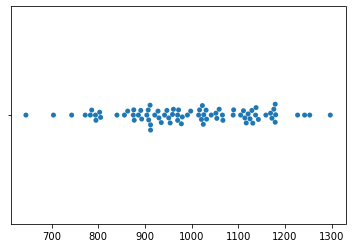

In [39]:
sns.swarmplot(x=measures)

## Violin Plot
* If we have too much data

<AxesSubplot:>

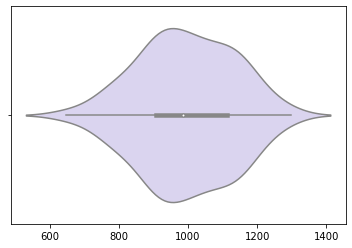

In [40]:
sns.violinplot(x=measures,color="#d7d0f3")

## Box Plot

<AxesSubplot:>

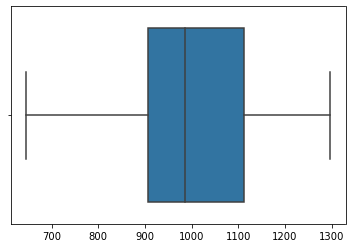

In [41]:
sns.boxplot(x=measures) 

Here's a quick explanation of what a box and whisker plot means:
![d](https://github.com/umsi-data-science/si618-student/raw/main/assets/boxplot.png "boxplot")

In [42]:
# median is not mean of Q1 AND Q3, and can can outliers below min and beyond max;
# boxplot is a 综合 of median/percitile/min max/outlier

## Histogram

We're going to use this a lot.  Seaborn puts a nice smooth line over a distribution.  We'll talk about that soon, but for now just think about it as an extrapolation:  if we had a bunch more data, the distribution would eventually smooth out to something that looks like the line.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

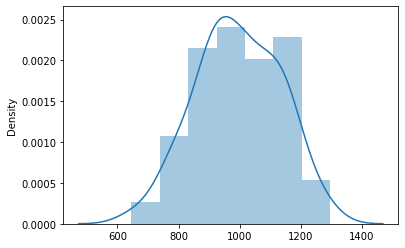

In [43]:
# x axis = value, y axis = count (frequency)
sns.distplot(measures) 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


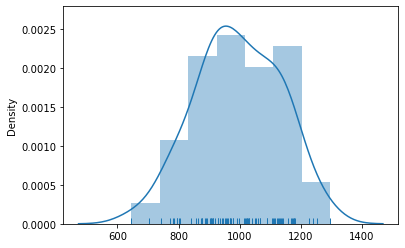

In [44]:
sns.distplot(measures, rug=True); # show a strip plot on bottom -- we call it a "rug"


Your turn:  run the following cells on your data to generate the plots described above.  

In [45]:
%matplotlib inline

import seaborn as sns  # you might need to do: conda install seaborn
import matplotlib.pyplot as plt


<AxesSubplot:>

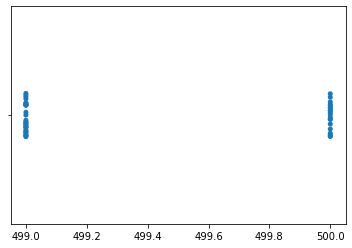

In [46]:
sns.stripplot(x=things)

<AxesSubplot:>

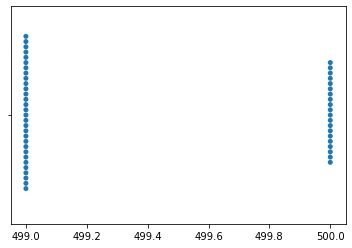

In [47]:
sns.swarmplot(x=things)

<AxesSubplot:>

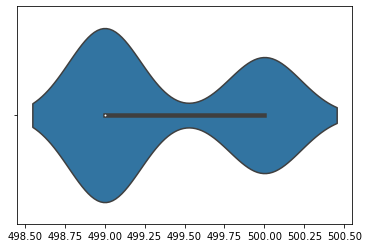

In [48]:
sns.violinplot(x=things)

<AxesSubplot:>

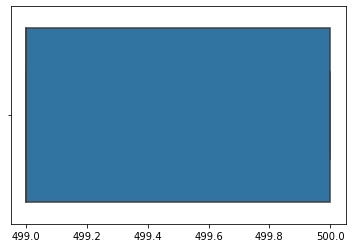

In [49]:
sns.boxplot(x=things)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

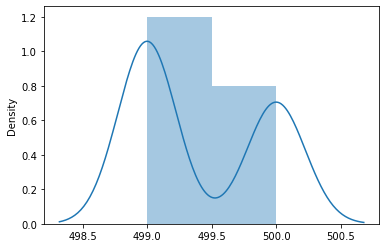

In [51]:
sns.distplot(things,kde=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

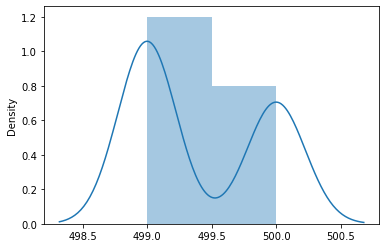

In [52]:
sns.distplot(things,kde=True)

<div style="width:100%;height:400px;padding:10px;background-color:#"></div>

## Expressiveness, Effectiveness, Scale

* Expressiveness
 * What facts can we extract?
 * What facts *can't* we extract?
* How well can we extract them?
* How do they work with more data?
 * Consider different dimensions
 * More samples
 * More univariate data

## Why do we care about distributions?
## World is not normal
* Many other kinds of distributions
* We can tell what they are by looking at distribution

## Uniform

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

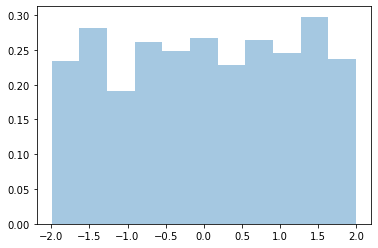

In [53]:
uniform = np.random.uniform(-2,2,1000)  # low,high,count
sns.distplot(uniform,kde=False,norm_hist=True)

## Bimodal

<AxesSubplot:>

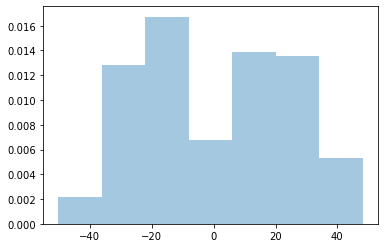

In [54]:
bimodal = np.append(np.random.normal(-20,10,100),
                    np.random.normal(20,10,100))
sns.distplot(bimodal,kde=False,norm_hist=True)

# Poisson

$$ P(k~events~in~interval) = \frac{\lambda^ke^{-\lambda}}{k!} $$   
 rare happen possibility

$\lambda$ is the event rate     


Examples
* Meteor strikes
* Arrival of patients to hospital

<AxesSubplot:>

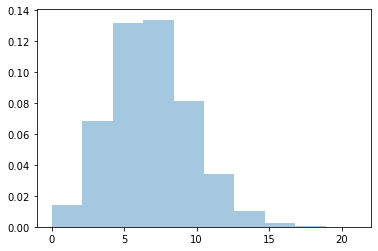

In [55]:
# as lambda 𝜆  goes up --> looks more normal
pois = np.random.poisson(7,100000) # lambda, count 
sns.distplot(pois,kde=False,bins=10,norm_hist=True)

# Power/Zipf/Pareto

$$ P = \frac{x^{-a}}{\zeta(a)}$$

"long tail"
* degree distribution
* movie/music popularity
* words

## Note:  both axes are log-transformed

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

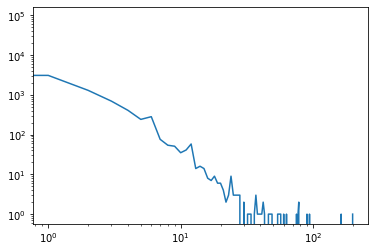

In [63]:
# bit of a hack (seaborn)
import random
np.random.seed(4200)

power = np.random.zipf(3,100000) #Zipf distribution
ax = plt.plot(np.histogram(power,bins=200)[0]) # draw
# log transformed
ax[0].axes.set_xscale("log")
ax[0].axes.set_yscale("log")

<div style="width:100%;height:400px;padding:10px;background-color:#"></div>

## Visual Tests on Data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

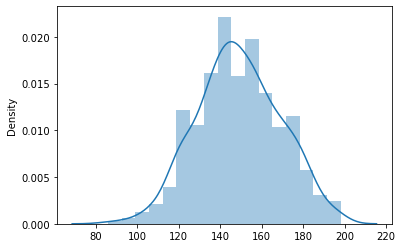

In [64]:
testdata = (np.random.standard_normal(500)*20+150).astype(int)
sns.distplot(testdata)

## Run Sequence
* Run Sequence (index versus value)
* flat and non-drifting
 * fixed-location assumption holds
* vertical spread same over the entire plot, 
 * then the fixed-variation assumption holds.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'i')

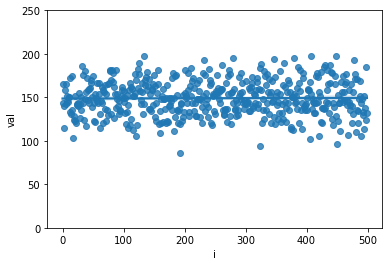

In [65]:
ax = sns.regplot(np.arange(len(testdata)),testdata,fit_reg=True)
ax.set_ylim(0,250)
ax.set_ylabel("val")
ax.set_xlabel("i")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

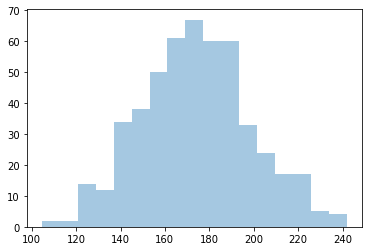

In [66]:
drifting = np.array([testdata[i]+i*(.1) for i in np.arange(len(testdata))])
sns.distplot(drifting,kde=False)

Text(0.5, 0, 'i')

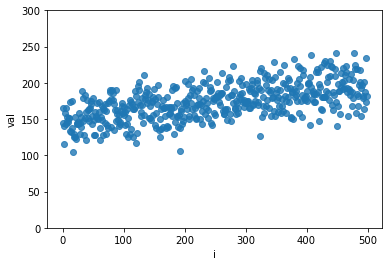

In [72]:
# mean is increasing 

ax = sns.regplot(np.arange(len(drifting)),drifting,fit_reg=False)
ax.set_ylim(0,300)
ax.set_ylabel("val")
ax.set_xlabel("i")

<AxesSubplot:>

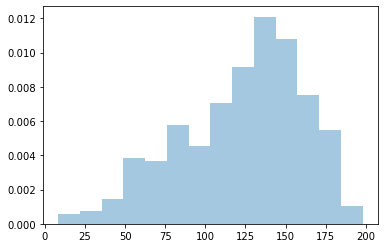

In [73]:
expanding = np.array([(testdata[i]+i*np.random.randint(-1,1)*.2)
                     for i in np.arange(len(testdata))])
sns.distplot(expanding,kde=False,norm_hist=True)

Text(0.5, 0, 'i')

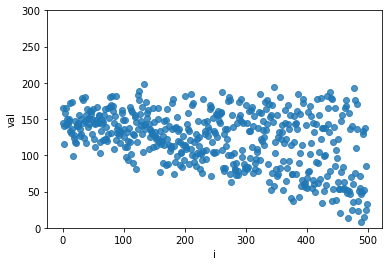

In [74]:
# var is increasing 
ax = sns.regplot(np.arange(len(expanding)),expanding,fit_reg=False)
ax.set_ylim(0,300)
ax.set_ylabel("val")
ax.set_xlabel("i")

# Lag Plot

* Plot point $y_i$ versus $y_{i-1}$
* If the lag plot is structureless
 * randomness assumption holds.

In [77]:
# a = [1,2,3,4,5]
# a[1:]

Text(0.5, 0, 'y_i')

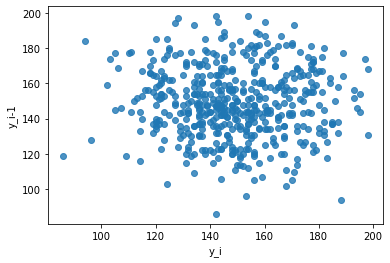

In [78]:
lag = testdata.copy()
lag = np.array(lag[:-1]) #except last one
current = testdata[1:] #except first one
ax = sns.regplot(current,lag,fit_reg=False)
ax.set_ylabel("y_i-1")
ax.set_xlabel("y_i")

<AxesSubplot:>

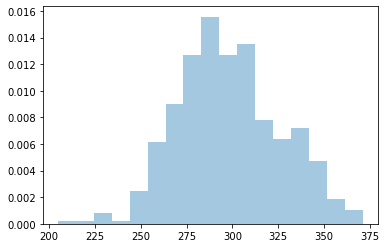

In [81]:
# give connection
connected = np.array([testdata[i]+testdata[i-1] for i in np.arange(500)])
sns.distplot(connected,kde=False,norm_hist=True)

Text(0.5, 0, 'y_i')

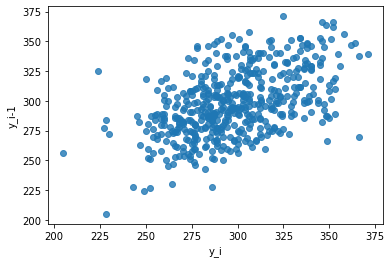

In [82]:
# will see correlation
lag = connected.copy()
lag = np.array(lag[:-1])
current = connected[1:]
ax = sns.regplot(current,lag,fit_reg=False)
ax.set_ylabel("y_i-1")
ax.set_xlabel("y_i")

## QQ Plot
* QQ Plots takes our n ordered data points
 * sorted from smallest to largest
* Asks:
 * What is the relationship between quantiles from our data and quantiles from a theoretical distribution that we're assuming the sample is drawn from (typically normal distribution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

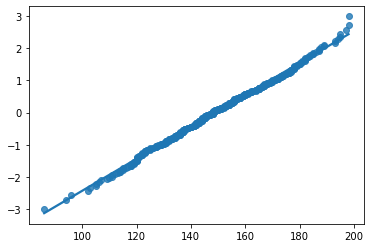

In [100]:
qntls, xr = stats.probplot(testdata, fit=False)
sns.regplot(xr,qntls)

In [101]:
# skewed
def random_snorm(n, mean = 0, sd = 1, xi = 1.5):
    def random_snorm_aux(n, xi):
        weight = xi/(xi + 1/xi)
        z = np.random.uniform(-weight,1-weight,n)
        xi_ = xi**np.sign(z)
        random = -np.absolute(np.random.normal(0,1,n))/xi_ * np.sign(z)
        m1 = 2/np.sqrt(2 * np.pi)
        mu = m1 * (xi - 1/xi)
        sigma = np.sqrt((1 - m1**2) * (xi**2 + 1/xi**2) + 2 * m1**2 - 1)
        return (random - mu)/sigma

    return random_snorm_aux(n, xi) * sd + mean


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

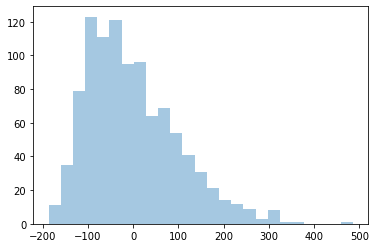

In [102]:
# rightskewed
rightskewed = random_snorm(1000,xi=2)*100
sns.distplot(rightskewed,kde=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

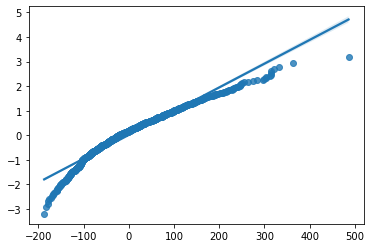

In [103]:
# rightskewed qq plot
qntls, xr = stats.probplot(rightskewed, fit=False)
sns.regplot(xr,qntls)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

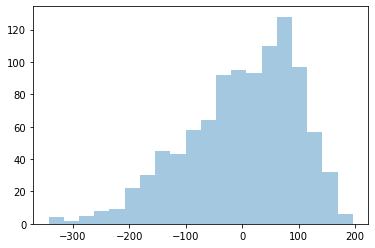

In [104]:
# left skewed qq plot
leftskewed = random_snorm(1000,xi=-2)*100
sns.distplot(leftskewed,kde=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

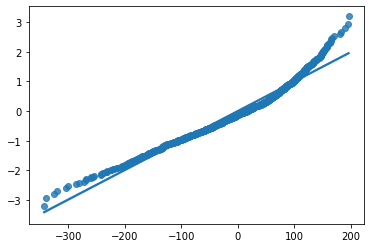

In [105]:
qntls, xr = stats.probplot(leftskewed, fit=False)
sns.regplot(xr,qntls)

## Now the serious plots... let's wrap them in a single function that we can call

In [106]:
# why we test because: we need truly random sample, rather than some corrolated/ have some relation data

In [107]:
# multiple plots
def multiplePlots( series ):
    
    # layout
    fig, axs = plt.subplots(2,2)
    plt.tight_layout(pad=0.4, w_pad=4, h_pad=1.0)

    # Histogram
    sns.distplot(series, ax=axs[0,0])
    
    # Lag plot
    lag = series.copy()
    lag = np.array(lag[:-1])
    current = series[1:]
    ax = sns.regplot(current,lag,fit_reg=False, ax=axs[0,1])
    ax.set_ylabel("y_i-1")
    ax.set_xlabel("y_i")
    
    # QQ plot
    qntls, xr = stats.probplot(series, fit=False)
    sns.regplot(xr,qntls, ax=axs[1,0])
    
    # Run sequence
    ax = sns.regplot(np.arange(len(series)),series, ax=axs[1,1])
    ax.set_ylabel("val")
    ax.set_xlabel("i")


## Now run this on your "things"

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings

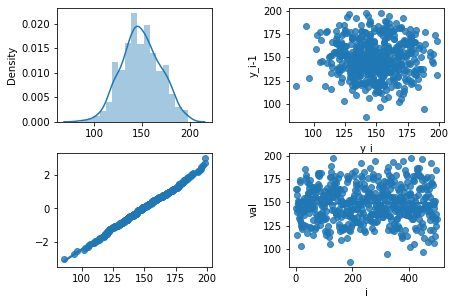

In [108]:
multiplePlots(testdata) # note: you will need to change this line.

## <font color="red"><a href="https://www.theguardian.com/news/datablog/2010/jul/16/data-plural-singular">Do your data look normally distributed?</a></font>

# Univariate Data -- Summary
* Simple but valuable
* We want to know how data is distributed
* How does it fit known models/distributions
* When does it not?
 * Visual and analytical tests

<div style="width:100%;height:400px;padding:10px;background-color:#"></div>